In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [228]:
#B = [0.0,0.0,1.0]
F = [0.0,-0.5,0.0]/np.sqrt(2.0)*0.0

#Bfun = lambda x: [0.0,0.0,1.0]
Bfun = lambda x: [0.0,0.0,1.0]

m = np.array([0.0,0.0,1.0])*1e-0 # * 1e3
def Bfun(x):
    x = np.array(x)
    r = np.sqrt(np.dot(x,x))
    res = 3.0*x*np.dot(m,x)/r**5-m/r**3
    return res


u0 = [1.0,1.0,1.0]/np.sqrt(3.0)*1e-2
x0 = [1.0,0.0,0.0]
omega_c = 1.0
tmax = 183.82*4.0*2.0*np.pi/omega_c

In [229]:
u = u0
x = x0
t = 0

ustore = np.array(u)
xstore = x
tstore = t


dt = tmax/10000

while t < tmax:
    
    x[0] = x[0] + 0.5*dt*u[0]
    x[1] = x[1] + 0.5*dt*u[1]
    x[2] = x[2] + 0.5*dt*u[2]
    
    B = Bfun(x)
    
    u[0] = u[0] + dt*(omega_c*(u[1]*B[2] - u[2]*B[1]) + F[0])
    u[1] = u[1] + dt*(omega_c*(u[2]*B[0] - u[0]*B[2]) + F[1])
    u[2] = u[2] + dt*(omega_c*(u[0]*B[1] - u[1]*B[0]) + F[2])
    
    x[0] = x[0] + 0.5*dt*u[0]
    x[1] = x[1] + 0.5*dt*u[1]
    x[2] = x[2] + 0.5*dt*u[2]
    
    t = t+dt
    
    ustore = np.vstack((ustore,u))
    xstore = np.vstack((xstore,x))
    tstore = np.vstack((tstore,t))

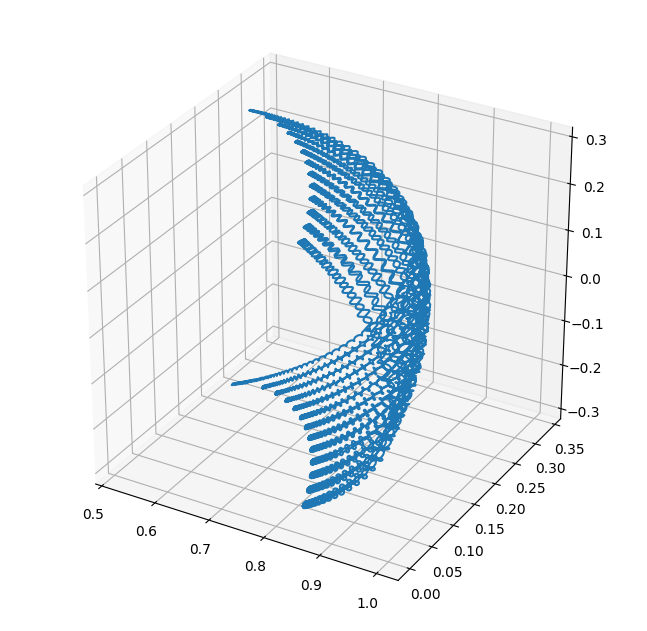

In [230]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xstore[:,0],xstore[:,1],xstore[:,2])
#plt.plot(xstore[:,1],xstore[:,2])